# TP 3 : Scientific operations tools

## Part I. - Socio-Eco. database
### I.1) Import module gapminder and use the method ; head(), describe() & info() to familiarize with it.

In [38]:
from gapminder import gapminder as gap
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.DataFrame.head(gap)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [39]:
pd.DataFrame.describe(gap)

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [40]:
pd.DataFrame.info(gap)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### I.2) Use pandas.DataFrame.hist(gapminder) to have an idea of what looks like the database.

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'lifeExp'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'gdpPercap'}>]], dtype=object)

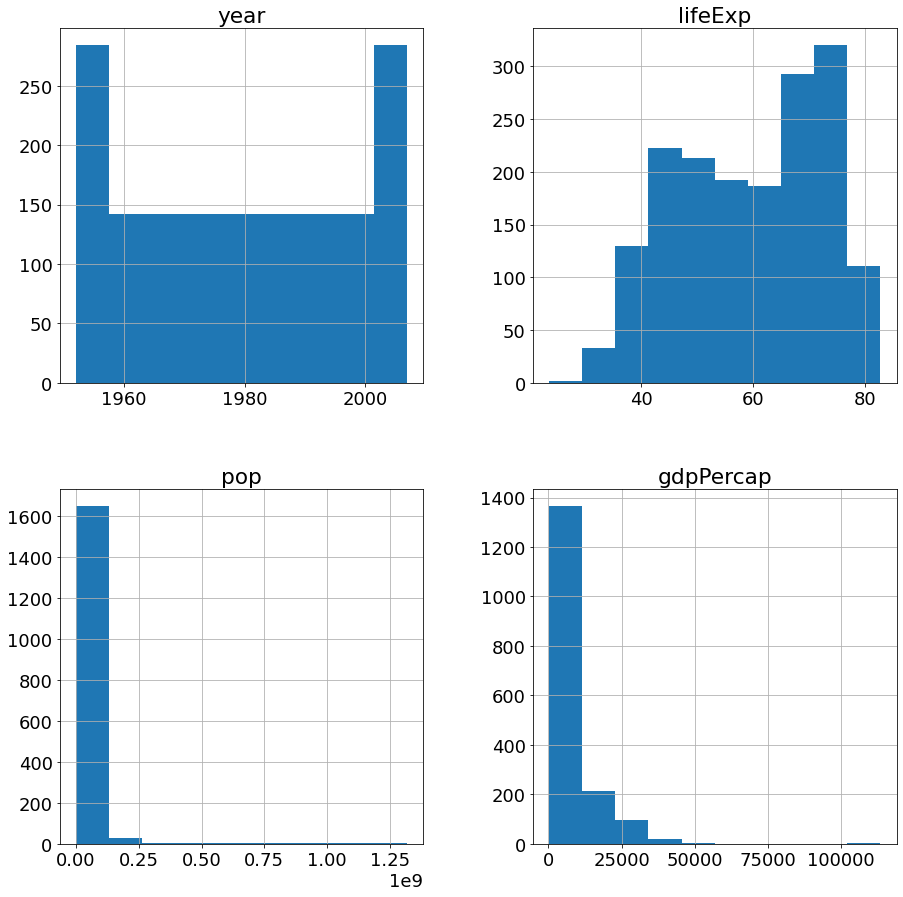

In [41]:
pd.DataFrame.hist(gap, figsize=(15,15))

Observations **"Q1 : Which conclusion can you make about this histogram ?"** :
- With the first plot, we can say that measures haven't been done every year.
- Life expectancy is mostly around 70 years old, as shown by the second plot, but there are also some countries that have a lower life expectancy than 40 years old.

### I.3) Find how many measures have been made for each country & if there is missing values.

In [42]:
## Missing values (defined by <NA>)
print("lifeExp   : ", sum(pd.isna(gap["lifeExp"])))
print("year      : ", sum(pd.isna(gap["year"])))
print("gdpPerCap : ", sum(pd.isna(gap["gdpPercap"])))

lifeExp   :  0
year      :  0
gdpPerCap :  0


**With this, we can see that there is no missing values.**

In [43]:
## Number of analysis :
print("Nbr. of COUNTRY analysed             :  ", len(gap['country'].unique()))
print("Nbr. of YEAR when there was analysis :   ", len(gap['year'].unique()))
print()
print("Total analysis                       : ", len(gap['country'].unique()) * len(gap['year'].unique()))

Nbr. of COUNTRY analysed             :   142
Nbr. of YEAR when there was analysis :    12

Total analysis                       :  1704


### I.4) List unique values into ; CONTINENT, COUNTRY & YEAR columns.

In [44]:
print(gap['continent'].unique())

['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']


In [45]:
print(gap['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar

In [46]:
print(gap['year'].unique())

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


### I.5) Reckon the mean value of the life expectancy in 1952 & 2007, then make a bar chart out of it.

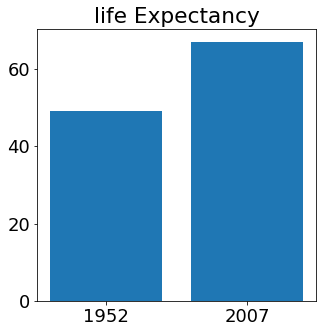

In [47]:
## List for mean value of ; 1952 & 2007 :
avg_1952 = pd.DataFrame.mean(gap[gap["year"] == 1952]["lifeExp"])
avg_2007 = pd.DataFrame.mean(gap[gap["year"] == 2007]["lifeExp"])

## Set plot size
plt.figure(figsize=(5,5))

## Set font size around graph
plt.rcParams.update({'font.size': 18})

## Fill bars
plt.bar(["1952", "2007"], [avg_1952, avg_2007])

## plot Title
plt.title("life Expectancy")

## Show plot
plt.show()

### I.6) Reckon the mean value of the life expectancy for each CONTINENT in 1952 & 2007, then generate a bar chart to compare the different values.

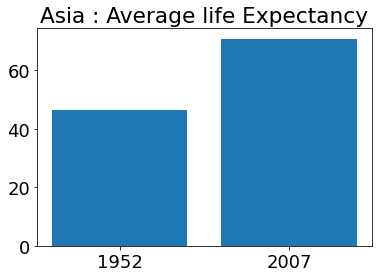

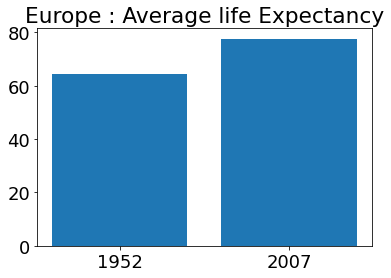

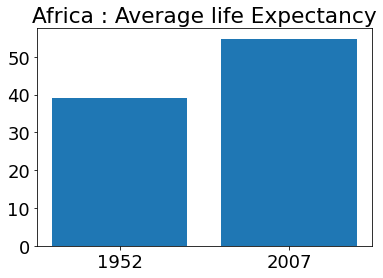

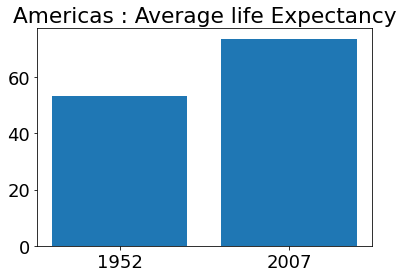

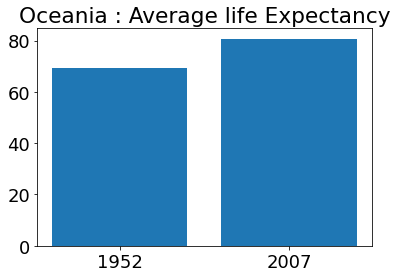

In [48]:
## For unique CONTINENT ..
for cont in pd.unique(gap["continent"]):
    ## Recover infos depending of the CONTINENT and the YEAR :
    ls_cont_1952 = gap[(gap["year"] == 1952) & (gap["continent"] == cont)]
    ls_cont_2007 = gap[(gap["year"] == 2007) & (gap["continent"] == cont)]
    
    ## Make the mean value :
    avg_1952 = pd.DataFrame.mean(ls_cont_1952["lifeExp"])
    avg_2007 = pd.DataFrame.mean(ls_cont_2007["lifeExp"])
    
    ## Show plot with ; BAR's infos & graph title
    plt.bar(["1952", "2007"], [avg_1952, avg_2007])
    plt.title(f"{cont} : Average life Expectancy")
    plt.show()

Observations **"Q2 : Which country have the highest increase ?"** : 
- It's **Asia**.
- Plus, we can see that no matter the continent, the life expectancy has considerably risen over the year.

### I.7) Generate a plot showing the evolution between 1952 & 2007 of the population for each CONTINENT.

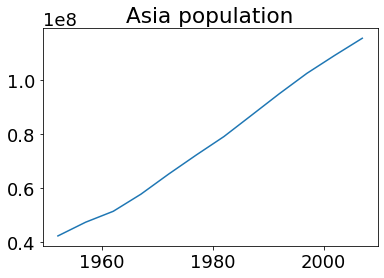

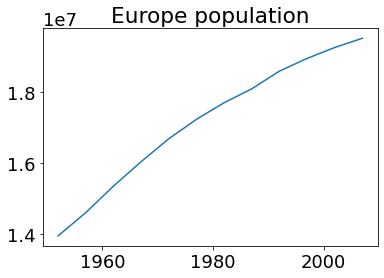

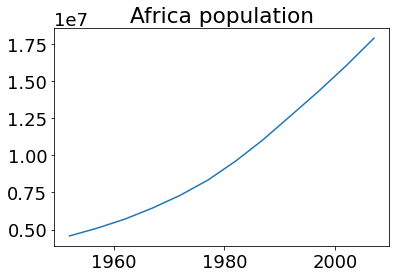

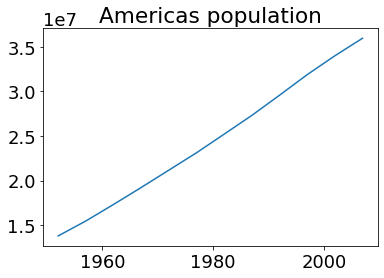

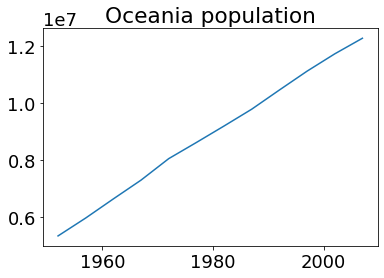

In [49]:
## List of the YEAR
ls_years = pd.unique(gap["year"])

## For each CONTINENT ..
for cont in pd.unique(gap["continent"]):
    ## Recover the mean value of population for each YEAR listed
    df_means = [pd.DataFrame.mean(d) for d in [gap[(gap["year"] == y) & (gap["continent"] == cont)]["pop"] \
                                               for y in ls_years]]
    
    ## Set plot's infos
    plt.plot(ls_years, df_means)  
    ## Set plot title
    plt.title(f"{cont} population")
    ## Show plot
    plt.show()

Observations **"Q3 : What can you conclude about those histograms ?"** : 
- With the previous graphes, they show us that the Average population has drastically increased through the ages.
- Plus, the Africa is the continent that has gain the most population over the decades.

### I.8) Generate 2 sub-plots that will contain scatters with :
#### the gdpPerCap        as the 'X' axis &
#### the life Expectancy as the 'Y' axis
#### for 1952 & 2007 (make 2 plots and make a color for each CONTINENT)

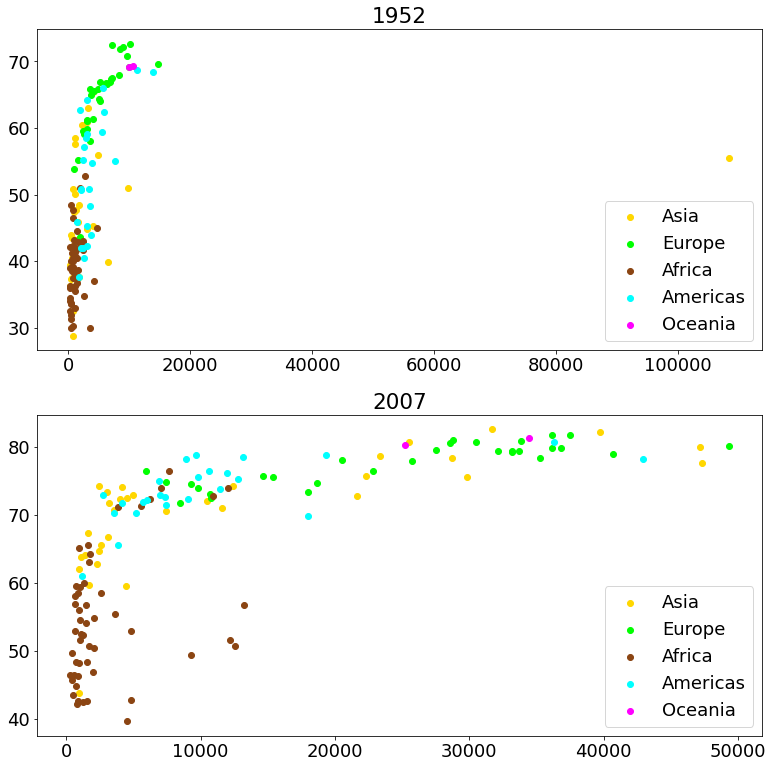

In [50]:
## Secondary dataframes depending of the YEAR wanted :
df_1952 = gap[(gap["year"] == 1952)]
df_2007 = gap[(gap["year"] == 2007)]

## Set colors for each CONTINENT
colors = {"Asia" : "gold", "Europe" : "lime", "Africa" : "saddlebrown", "Americas" : "cyan", "Oceania" : "magenta"}

## Set sub-plots and plot size
fig, axs = plt.subplots(2, figsize=(13,13))
## For each CONTINENT ..
for cont in pd.unique(gap["continent"]):
    ## 1952 ----------------------------------------------------->
    ## Make a list of the X & Y values
    x_1952 = df_1952[df_1952["continent"] == cont]["gdpPercap"]
    y_1952 = df_1952[df_1952["continent"] == cont]["lifeExp"]
    ## Set first plot
    axs[0].scatter(x_1952, y_1952, c=colors[cont])
    axs[0].title.set_text("1952")
    axs[0].legend(colors)
    
    ## 2007 ----------------------------------------------------->
    ## Make a list of the X & Y values
    x_2007 = df_2007[df_2007["continent"] == cont]["gdpPercap"]
    y_2007 = df_2007[df_2007["continent"] == cont]["lifeExp"]
    ## Set second plot
    axs[1].scatter(x_2007, y_2007, c=colors[cont])
    axs[1].title.set_text("2007")
    axs[1].legend(colors)
## Show plots
plt.show()

In [51]:
## Find the value over 100k for the gdpPerCap
print(max(df_1952["gdpPercap"]))

108382.3529


In [52]:
## Find which country as the previous value
#print(df_1952[df_1952["gdpPercap"] == max(df_1952["gdpPercap"])])
print(df_1952[df_1952["gdpPercap"] == max(df_1952["gdpPercap"])]["country"])

852    Kuwait
Name: country, dtype: object


**On the scatter plot of 1952**, there is a gdpPerCap's value that is bigger than the other (the over 100k one), that we think of it is absurd. 
\
So we wanted to know which one was it. And we found that it's the **Kuwait's gdpPerCap**.
\
We assume that **it is a wrong value**, so we decided to make another plot without it (only for 1952).
\
***From now, on every 1952 plot, Kuwait will be omitted***.

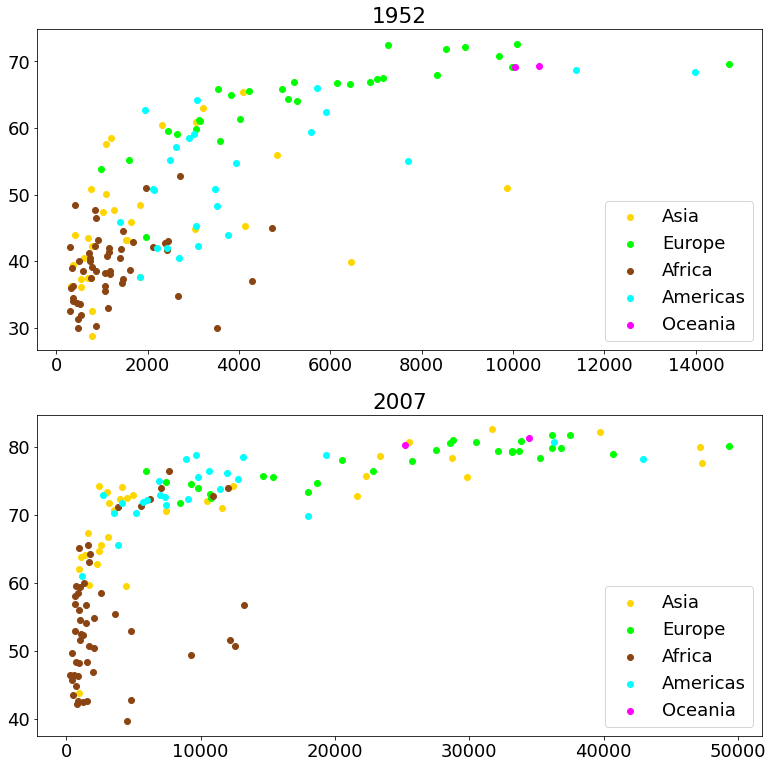

In [53]:
## Replacing dataframe of 1952 and don't take Kuwait in consideration :
df_1952 = gap[(gap["year"] == 1952) & (gap["country"] != "Kuwait")]

## Set sub-plots and plot size
fig, axs = plt.subplots(2, figsize=(13,13))
## For each CONTINENT ..
for cont in pd.unique(gap["continent"]):
    ## 1952 ----------------------------------------------------->
    ## Make a list of the X & Y values
    x_1952 = df_1952[df_1952["continent"] == cont]["gdpPercap"]
    y_1952 = df_1952[df_1952["continent"] == cont]["lifeExp"]
    ## Set first plot
    axs[0].scatter(x_1952, y_1952, c=colors[cont])
    axs[0].title.set_text("1952")
    axs[0].legend(colors)
    
    ## 2007 ----------------------------------------------------->
    ## Make a list of the X & Y values
    x_2007 = df_2007[df_2007["continent"] == cont]["gdpPercap"]
    y_2007 = df_2007[df_2007["continent"] == cont]["lifeExp"]
    ## Set second plot
    axs[1].scatter(x_2007, y_2007, c=colors[cont])
    axs[1].title.set_text("2007")
    axs[1].legend(colors)
## Show plots
plt.show()

Observations **"Q4 : What are your conclusion about those histograms ?"** : 
- We can see that the continent with **the lowest life Expectancy & gdpPerCap is Africa**.
- Oceania doesn't have a lot of country, so there's not a lot of point.
- The continent with **the highest life Expectancy is Europe**. But its gdpPerCap is very diversified.
- Between the two plots, we can say that **life Expectancy has really increased**. **Except for Africa and Asia**, some countries still have a low life Expectancy.

### I.9) Generate scatter plots of the life Expectancy over the gdpPerCap
#### Separate each CONTINENT by a color.

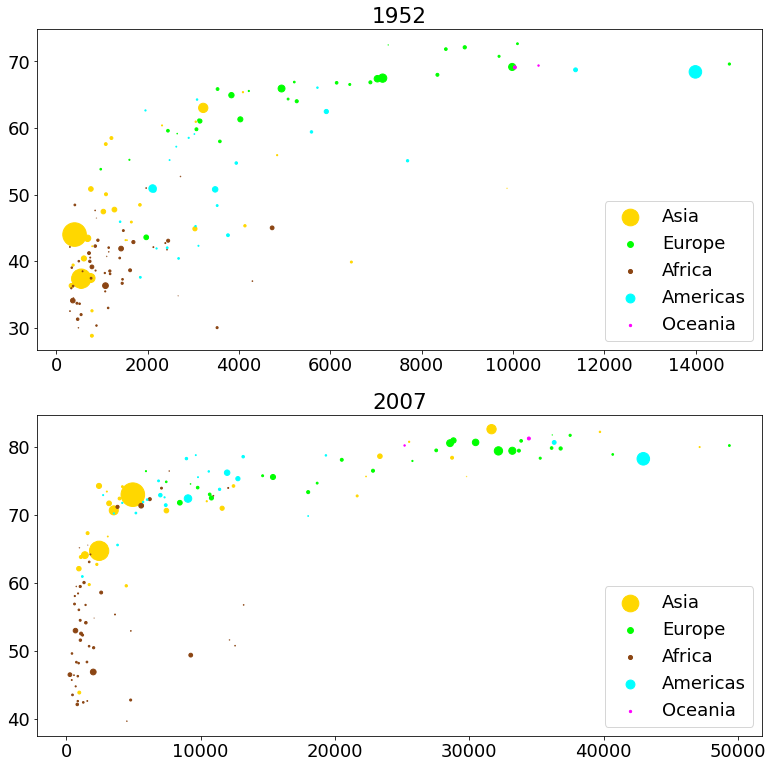

In [54]:
# Remove Kuwait for 2007, because both list must have the same size.
df_2007 = gap[(gap["year"] == 2007) & (gap["country"] != "Kuwait")]

## Set a certain reference for the dot size of the scatter plots
dotRef = 1_000_000

## Set sub-plots and plot size
fig, axs = plt.subplots(2, figsize=(13,13))
## For each CONTINENT ..
for cont in pd.unique(gap["continent"]):
    ## 1952 ----------------------------------------------------->
    ## Make a list of the X & Y values
    x_1952 = df_1952[df_1952["continent"] == cont]["gdpPercap"]
    y_1952 = df_1952[df_1952["continent"] == cont]["lifeExp"]
    ## Manage the scatter' size
    dotSize_1952 = df_1952[df_1952["continent"] == cont]["pop"] / dotRef
    ## Set first plot
    axs[0].scatter(x_1952, y_1952, s=dotSize_1952, c=colors[cont])
    axs[0].title.set_text("1952")
    axs[0].legend(colors)
    
    ## 2007 ----------------------------------------------------->
    ## Make a list of the X & Y values 
    x_2007 = df_2007[df_2007["continent"] == cont]["gdpPercap"]
    y_2007 = df_2007[df_2007["continent"] == cont]["lifeExp"]
    ## Manage the scatter' size
    dotSize_2007 = df_1952[df_1952["continent"] == cont]["pop"] / dotRef
    ## Set second plot
    axs[1].scatter(x_2007, y_2007, s=dotSize_2007, c=colors[cont])
    axs[1].title.set_text("2007")
    axs[1].legend(colors)
## Show plots
plt.show()

### I.10) Generate a scatter plot with the increase between 1952 & 2007 with :
#### the gdpPerCap as the 'X' axis &
#### the population  as the 'Y' axis

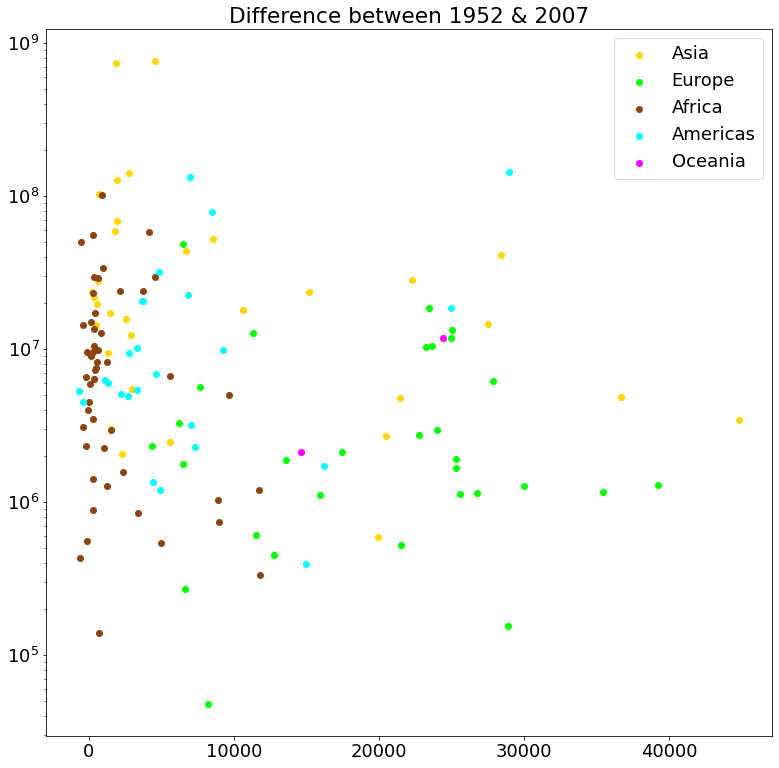

In [55]:
## Set sub-plots and plot size
plt.figure(figsize=(13,13))
## For each CONTINENT ..
for cont in pd.unique(gap["continent"]):
    ## Make list out of the gdpPerCap for each YEAR concerned  
    x_1952 = df_1952[df_1952["continent"] == cont]["gdpPercap"]
    x_2007 = df_2007[df_2007["continent"] == cont]["gdpPercap"]
    
    ## Make list out of the population for each YEAR concerned 
    y_1952 = df_1952[df_1952["continent"] == cont]["pop"]
    y_2007 = df_2007[df_2007["continent"] == cont]["pop"]
    
    ## Make array out of the difference between both YEAR concerned 
    x = np.array([g for g in x_2007]) - np.array([g for g in x_1952])
    y = np.array([p for p in y_2007]) - np.array([p for p in y_1952])
    plt.scatter(x, y, c=colors[cont])
## Show plot with a specific title, a log. scale on the 'Y' axis and add the legend to the plot.
plt.title("Difference between 1952 & 2007")
plt.yscale("log")
plt.legend(colors)
plt.show()

Observation **"Q5 : What can be seen in the previous scatter plot ?"** : 
\
- The trend is as follow : the lower the gdpPerCap, the higher population increase.\
  That's what we understand, but it is not clear enough for us with this plot.\
  It is a **trend** and not an equation or else.